#### Problem statement
The aim of this study is to develop an advanced machine learning model for breast cancer prediction and diagnosis that leverages a comprehensive set of features derived from diverse medical data sources. The model should achieve high accuracy, sensitivity, and specificity, thereby improving early detection rates and minimizing false positives/negatives.

In [1]:
# Importing lib
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import warnings
warnings.simplefilter('ignore')
from sklearn.datasets import load_breast_cancer
import plotly.graph_objs as go

In [2]:
# Data loading
data = load_breast_cancer()
# creating dataframe
df = pd.DataFrame(data=data.data,columns=data.feature_names)
# adding target aatributes
df['target'] = data.target

In [10]:
# saving dataset into csv
df.to_csv('data.csv',index=False)

In [3]:
# data ingestion
df = pd.read_csv('data.csv')
# preview the data
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# check for shape
df.shape

(569, 31)

In [21]:
# check for basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [39]:
# check for descriptive stats
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
mean texture,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
mean perimeter,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
mean area,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
mean smoothness,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
mean compactness,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
mean concavity,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
mean concave points,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
mean symmetry,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
mean fractal dimension,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [25]:
# check for null values 
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [26]:
# check for duplicates values
df.duplicated().sum()

0

In [27]:
# check for unique value in target feature
df['target'].nunique()

2

In [28]:
df['target'].unique() #Malignant, Benign

array([0, 1], dtype=int64)

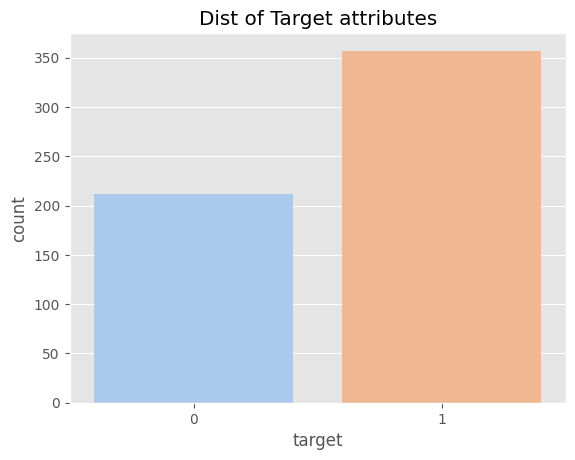

In [56]:
# data visualization
sns.countplot(data=df,x=df['target'],palette="pastel")
plt.title('Dist of Target attributes')
plt.show()

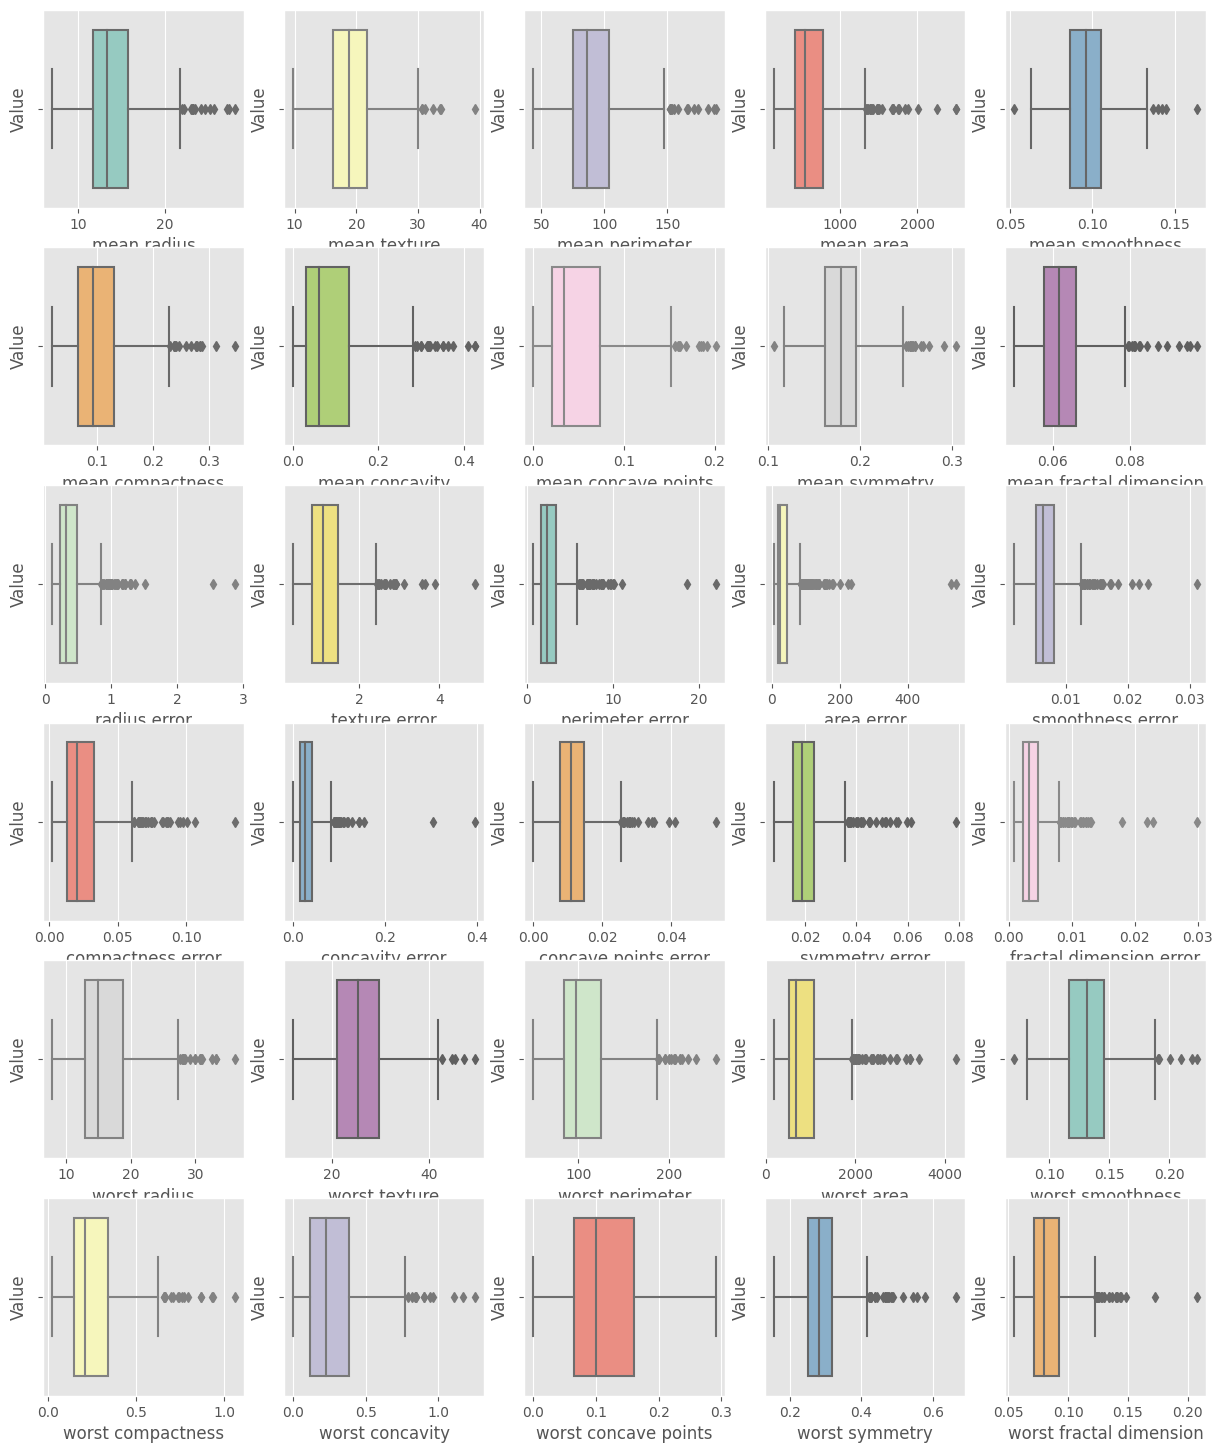

In [72]:
fig, axes = plt.subplots(6, 5, figsize=(15, 6 * 3))

# Flatten the axes array for ease of iteration
axes = axes.flatten()
custom_palette = sns.color_palette("Set3", len(df.columns))
# Plot boxplots for each column
for i, column in enumerate(df.columns):
    if i >= len(axes):
        break  # Exit loop if all subplots are filled (for odd number of columns)
    sns.boxplot(x=df[column], ax=axes[i],color=custom_palette[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Value')
plt.show()

- Looking at above two diag we can say that cleary our data is imbalance means malignant are less than benign
- And data has outliers also.

In [6]:
# Extracting numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype != 'O']
numerical_cols = numerical_cols[:-1]
numerical_cols

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

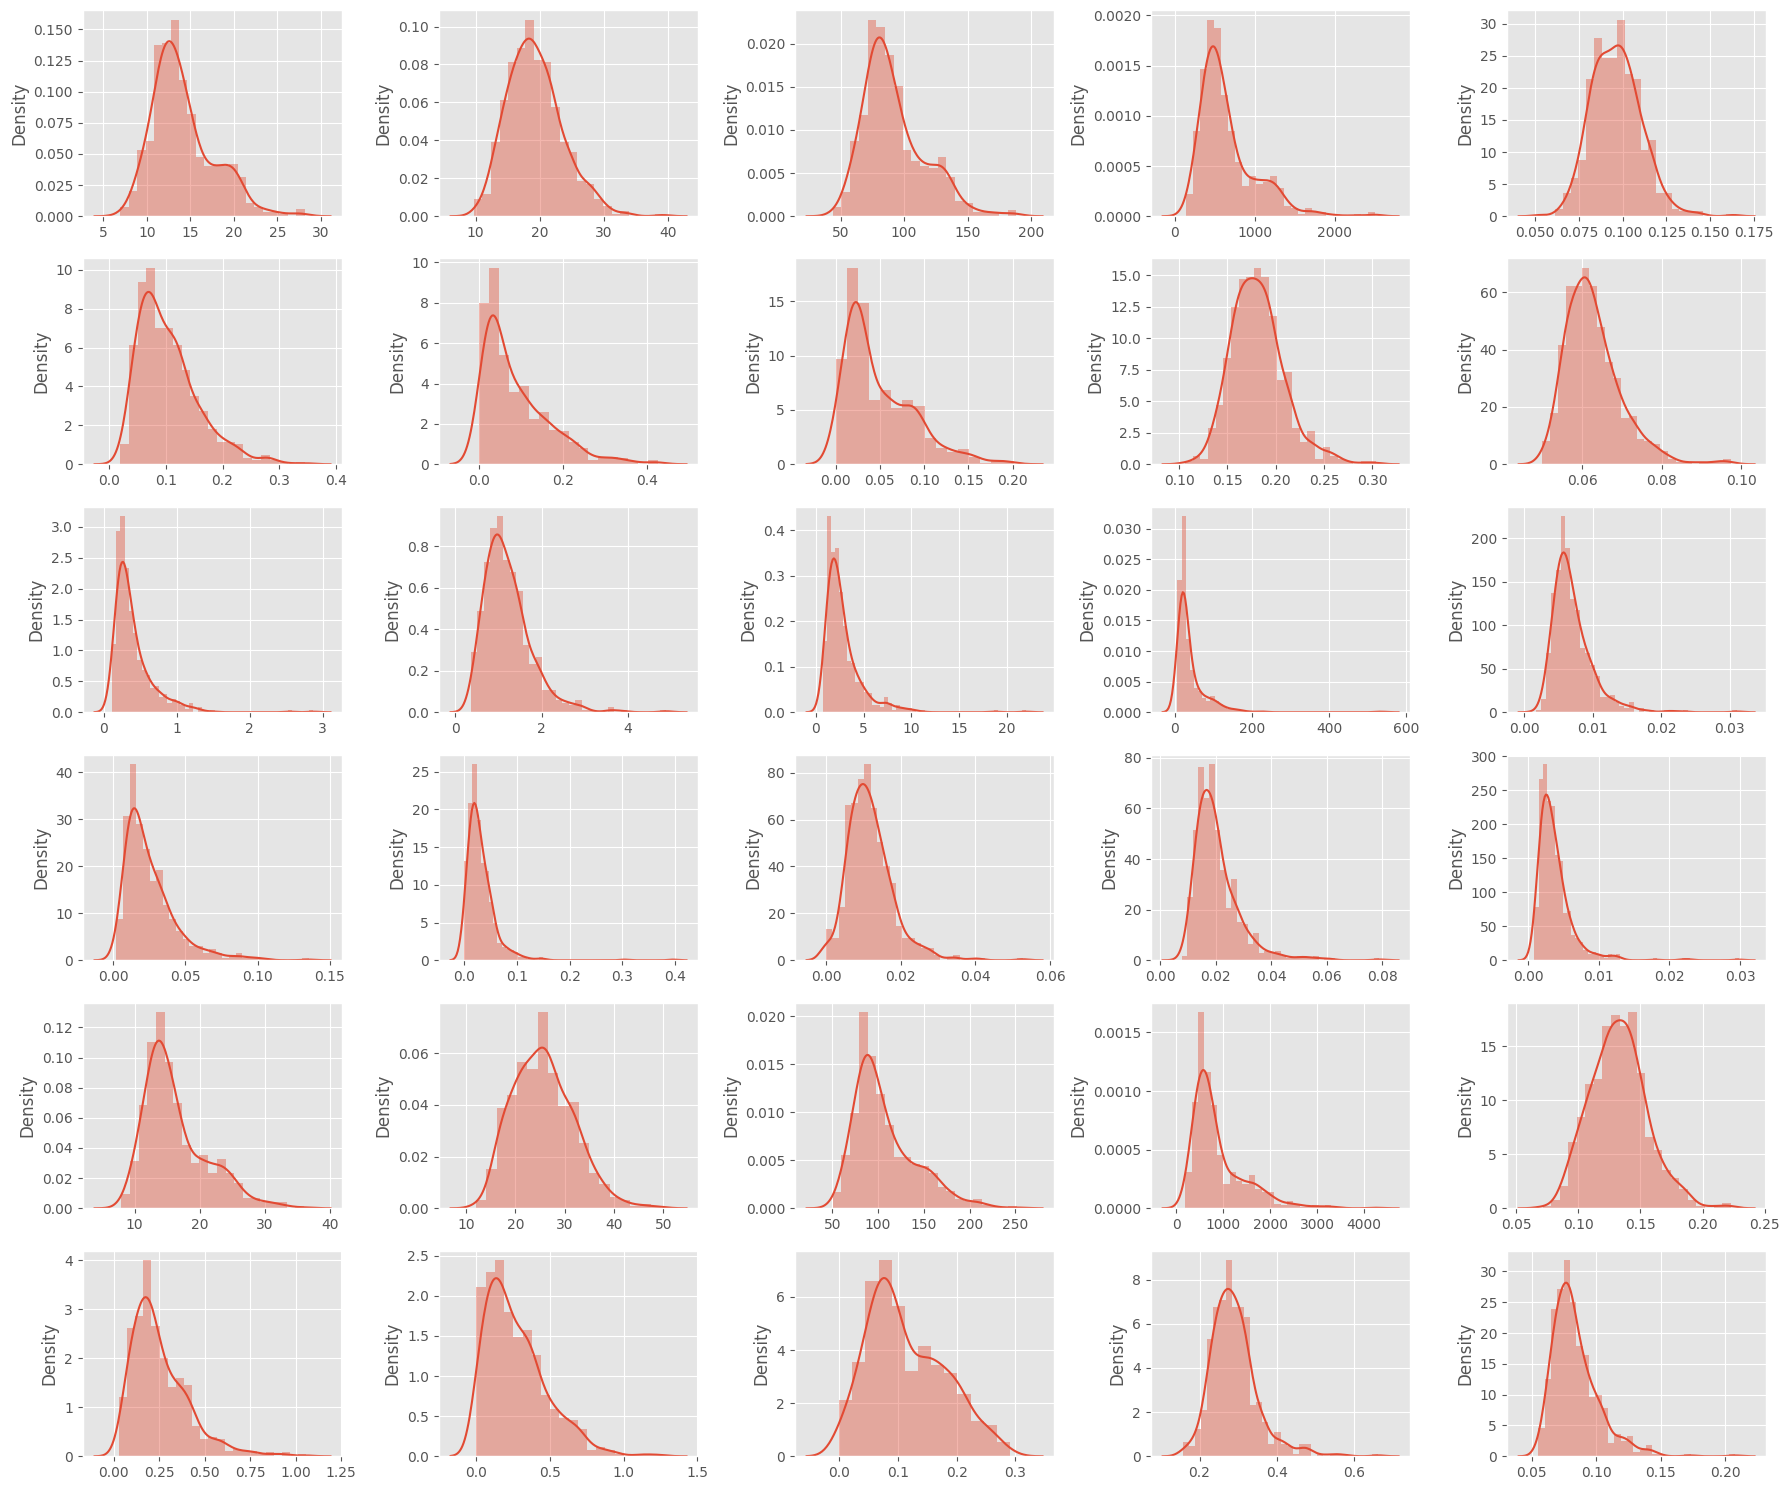

In [87]:
# visualizing distribution our numerical columns
plt.figure(figsize=(18,15))
for i in range(0,len(numerical_cols)):
    plt.subplot(6,5,i+1)
    sns.distplot(x=df[numerical_cols[i]])
    plt.tight_layout()

In [107]:
# Segregate feature into X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [108]:
# train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

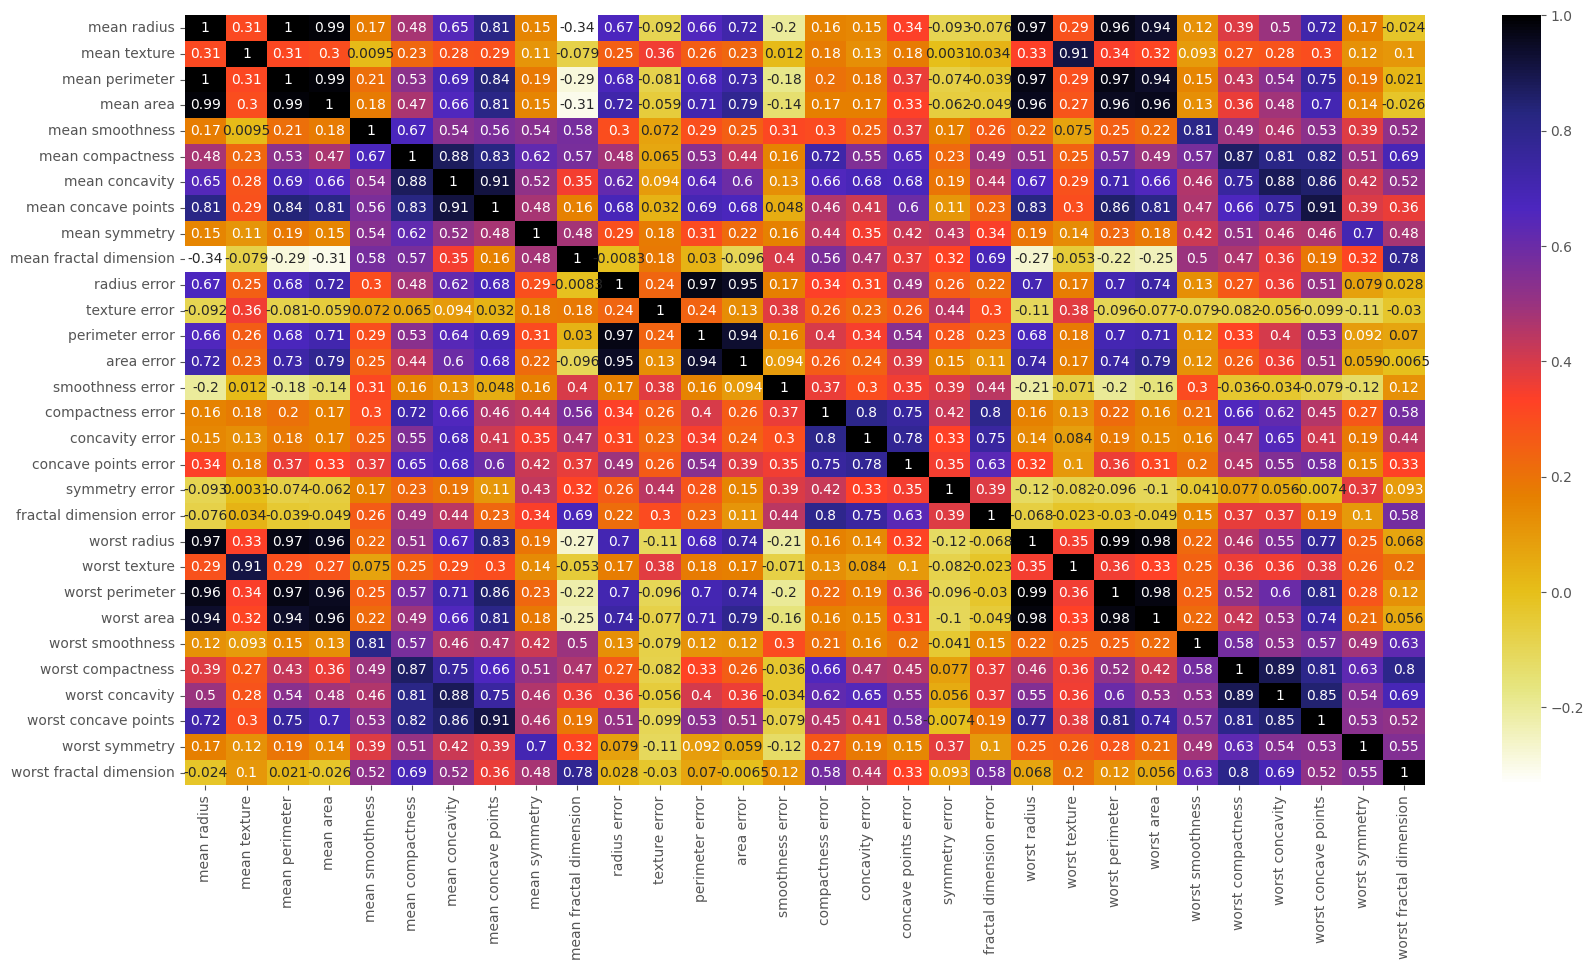

In [111]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [112]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [119]:
corr_features = correlation(X_train,0.90)
len(set(corr_features))

10

In [126]:
len(X_train.columns)

20

In [131]:
# Segregate feature into X and y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [128]:
# Data transformation
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = StandardScaler()

In [133]:
numerical_cols = [col for col in X.columns if X[col].dtype != 'O']

In [134]:
preprocessor = ColumnTransformer(
    [
        ('standardscaler',numeric_transformer,numerical_cols)
    ]
)

In [136]:
X = preprocessor.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [139]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(455, 30)

In [140]:
X_test.shape

(114, 30)

In [141]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [142]:
from sklearn.metrics import accuracy_score
def evaluate_model(true,predicted):
    score = accuracy_score(true,predicted)
    return score

In [145]:
models = {
    'logreg':LogisticRegression(),
    'svc':SVC(),
    'dt':DecisionTreeClassifier(),
    'random':RandomForestClassifier(criterion="entropy") 
}

In [148]:
for i in range(len(models)):
    model = list(models.values())[i]
    print(f'Model training started with {model} model')
    model.fit(X_train,y_train)
    print(f"Prediction started for X_train, X_test")
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("Evaluating performance of model")
    train_score = evaluate_model(y_train, y_train_pred)
    test_score = evaluate_model(y_test, y_test_pred)
    
    print('Model performance for Training set')
    print("- Score: {:.4f}".format(train_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- R2 Score: {:.4f}".format(test_score))

    print('='*35)
    print('\n')

Model training started with LogisticRegression() model
Prediction started for X_train, X_test
Evaluating performance of model
Model performance for Training set
- Score: 0.9868
----------------------------------
Model performance for Test set
- R2 Score: 0.9737


Model training started with SVC() model
Prediction started for X_train, X_test
Evaluating performance of model
Model performance for Training set
- Score: 0.9868
----------------------------------
Model performance for Test set
- R2 Score: 0.9737


Model training started with DecisionTreeClassifier() model
Prediction started for X_train, X_test
Evaluating performance of model
Model performance for Training set
- Score: 1.0000
----------------------------------
Model performance for Test set
- R2 Score: 0.9298


Model training started with RandomForestClassifier(criterion='entropy') model
Prediction started for X_train, X_test
Evaluating performance of model
Model performance for Training set
- Score: 1.0000
-------------------